In [194]:
import numpy
import matplotlib.pyplot
%matplotlib inline
# contains sigmoid function
import scipy.special



In [195]:
class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate) -> None:
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        #learning rate
        self.lr = learningrate

        # link weight matrices wih (weights in to hidden layer) and who (weights hidden to output layer)
        # weights inside the arrays are w_i_j where the link is from the node i to the node j in the next layer
        # w11 w21
        # w12 w22 etc

        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        self.wih = numpy.random.normal( 0.0, pow(self.inodes, -0.5), (self.hnodes , self.inodes))
        self.who = numpy.random.normal( 0.0, pow(self.hnodes, -0.5), (self.onodes , self.hnodes))

        self.activation_function = lambda x: scipy.special.expit(x)


        pass

    def train(self, inputs_list, targets_list):
        #convert inputs list into 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        #calculate signal into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)

        #calculate error (target - actual)
        output_errors = targets - final_outputs

        # backpropagate errors to hidden layer
        hidden_errors = numpy.dot(self.who.T, output_errors)

        #to refine the weights between the output & hidden layer, we use "output_errors"
        self.who += self.lr * numpy.dot( (output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        #to refine the weights between the hidden & the input layer, we use "hidden_errors"
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))



        pass

    def query(self, inputs_list):

        #convert input list into 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T

        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs


In [196]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.1

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [197]:
training_data_file = open("Data/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [198]:
#Train the neural network

# epics is the number of iterations we go through the training data 
epochs = 2

for e in range(epochs): 
    #go through all records in the training data set
    for record in training_data_list:
        #split the record by the ',' commas
        all_values = record.split(',')
        #scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        #create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [207]:
#load the mnist test data csv file into a list
test_data_file = open("Data/q_test.csv", 'r')
#test_data_file = open("Data/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

8


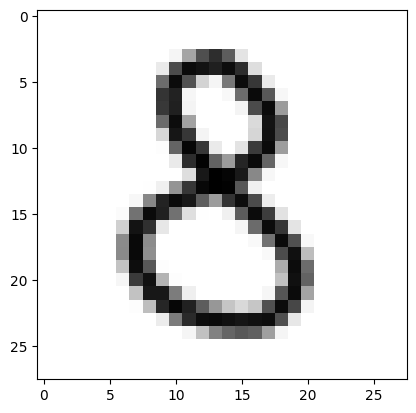

In [208]:
#get the first test record
testIdx = 2
all_values = test_data_list[testIdx].split(',')
#print the label
print(all_values[0])

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation=None)

In [209]:
print(all_values[0:])
results = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
print(results)
indexOfMostLikely = numpy.argmax(results)
print("most likely a: " + str(indexOfMostLikely))

['8', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '21', '113', '190', '213', '177', '48', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '39', '192', '241', '235', '224', '240', '213', '55', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '163', '241', '188', '69', '20', '151', '240', '206', '40', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '208', '221', '19', '0', '0', '14', '163', '242', '182', '15', '0', '0

In [210]:
#Test the neural network

#Scorecard for how well the network performs, initially empty
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    #split the record by the ',' commas
    all_values = record.split(',')
    #correct answer is the first character
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query the network
    outputs = n.query(inputs)
    #the index of the highest value corresponts to the label
    label = numpy.argmax(outputs)
    #print(label, "nework's answer")
    #append correct or incorrect to list
    if( label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer didn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

#print(scorecard)

#performance score as a fraction
scorecard_array = numpy.asarray(scorecard)
print("Performance = ", scorecard_array.sum() / scorecard_array.size)

Performance =  0.6666666666666666
